<a href="https://colab.research.google.com/github/Dhaneshkp/GraphML/blob/main/Fraudulent%20transactions-Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade certifi

!pip install --trusted-host files.pythonhosted.org optuna



In [2]:
os.listdir()

['.config', 'fraudTrain.csv', 'sample_data']

In [3]:
data=pd.read_csv("fraudTrain.csv")

In [4]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66139,66139,2019-02-09 00:51:25,5456712664803820,fraud_Schmitt Inc,gas_transport,57.63,Pamela,Matthews,F,36659 Smith Club Apt. 080,...,36.1486,-105.6648,247.0,Architectural technologist,1961-10-24,a372a0bb90c4fb06c826a95e42227a4b,1.328749e+09,37.142397,-105.534654,0.0
66140,66140,2019-02-09 00:51:29,4492491748959010,"fraud_Wiza, Schaden and Stark",misc_pos,37.77,Jonathan,Byrd,M,5554 Mack Meadows,...,37.3752,-81.6539,337.0,Advice worker,1986-10-17,378a6a85b35d9c4efd172505d0ba9e90,1.328749e+09,38.019461,-81.084323,0.0
66141,66141,2019-02-09 00:51:30,4671727014157745,fraud_Murray-Smitham,grocery_pos,112.00,Kenneth,Edwards,M,3653 Ryan Crossroad,...,40.8618,-85.6067,2304.0,Retail banker,1955-07-25,f1b5fdadbd68f64accf1ba124338f1b3,1.328749e+09,41.745678,-85.600975,0.0
66142,66142,2019-02-09 00:52:16,6011975266774121,"fraud_Connelly, Reichert and Fritsch",gas_transport,60.85,Haley,Wagner,F,05561 Farrell Crescent,...,39.0305,-76.5515,92106.0,"Accountant, chartered certified",1943-05-28,eb645f7947e86126d230def0bef112f4,1.328749e+09,39.933574,-75.921261,0.0


In [5]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,66144.00000,6.614400e+04,66144.000000,66144.000000,66144.000000,66143.000000,6.614300e+04,6.614300e+04,66143.000000,66143.000000,66143.000000
mean,33071.50000,4.222982e+17,72.006466,48680.454025,38.529437,-90.184239,8.958930e+04,1.327061e+09,38.528734,-90.186965,0.010024
std,19094.27244,1.315927e+18,152.805004,26937.186322,5.086128,13.845985,3.019134e+05,9.672279e+05,5.119034,13.858938,0.099616
min,0.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.670132,0.000000
25%,16535.75000,1.800429e+14,9.710000,25832.000000,34.620500,-96.786900,7.430000e+02,1.326225e+09,34.746189,-96.860930,0.000000
50%,33071.50000,3.519607e+15,47.950000,48088.000000,39.354300,-87.456900,2.457000e+03,1.327083e+09,39.357076,-87.371650,0.000000
75%,49607.25000,4.642255e+15,83.820000,72011.000000,41.846700,-80.124800,2.112500e+04,1.327866e+09,41.921401,-80.157066,0.000000
max,66143.00000,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.328749e+09,66.659242,-66.967742,1.000000


In [7]:
data.describe(include='object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,66144,66144,66144,66144,66144,66144,66144,66144,66144,66143,66143,66143
unique,65379,693,14,338,467,2,915,841,50,477,901,66143
top,2019-02-05 04:16:47,fraud_Cormier LLC,gas_transport,Christopher,Smith,F,11014 Chad Lake Apt. 573,San Antonio,TX,Exhibition designer,1977-03-23,0b242abb623afc578575680df30655b9
freq,3,216,6603,1412,1418,36174,187,284,4839,489,262,1


In [8]:
train_df = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num','first', 'last','trans_num', 'unix_time'],axis=1)
#test_df = pd.read_csv('fraudTest.csv')

In [9]:
train_df=train_df.sample(frac=0.5,random_state=1)

In [10]:
train_df['distance']= (train_df['lat'] - train_df['merch_lat'])**2 + (train_df['long'] - train_df['merch_long'])**2

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english') and not word.isdigit()])
    return text

# Apply cleaning to relevant columns
train_df['merchant'] = train_df['merchant'].apply(clean_text)
train_df['category'] = train_df['category'].apply(clean_text)
train_df['city_state'] = train_df['city'] + '_' + train_df['state']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
train_df['city_state'] = train_df['city'] + '_' + train_df['state']

In [13]:
train_df = train_df.dropna(subset=['dob'])

In [14]:
from datetime import datetime

# Function to calculate age
def calculate_age(dob):
    dob = str(dob)
    today = datetime.today()
    dob = datetime.strptime(dob, '%Y-%m-%d')
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Apply the function to the 'dob' column
train_df['age'] = train_df['dob'].apply(calculate_age)


In [15]:
categorical_columns = ['category', 'gender', 'job','city','state','merchant','street','city_state']
for column in categorical_columns:
    train_df[column] = train_df[column].astype('category')

In [16]:
train_df.dtypes

,0
merchant,category
category,category
amt,float64
gender,category
street,category
city,category
state,category
zip,int64
lat,float64
long,float64


In [17]:
import networkx as nx

G = nx.Graph()

# Add nodes and edges based on the data
for index, row in data.iterrows():
    trans_id = f'trans_{index}'
    G.add_node(trans_id, label='transaction')
    G.add_node(row['merchant'], label='merchant')
    G.add_node(row['category'], label='category')
    G.add_node(row['city'], label='city')
    G.add_node(row['state'], label='state')
    G.add_edge(trans_id, row['merchant'], relationship='made_at')
    G.add_edge(trans_id, row['category'], relationship='belongs_to')
    G.add_edge(trans_id, row['city'], relationship='located_in')
    G.add_edge(trans_id, row['state'], relationship='in')
    G.add_node(row['job'], label='job')
    G.add_edge(trans_id, row['job'], relationship='job')

In [18]:
train_df.drop(['merch_lat', 'merch_long','lat', 'long'],axis=1,inplace=True)

In [19]:
train_df.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'city_pop', 'job', 'dob', 'is_fraud', 'distance', 'city_state',
       'age'],
      dtype='object')

In [20]:
train_df.drop(['street','zip','city_pop'],axis=1,inplace=True)

In [21]:
train_df.drop(['dob'],axis=1,inplace=True)

In [22]:
train_df.to_csv("train_df_new.csv")

In [23]:
train_df=pd.read_csv("train_df_new.csv")
train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
!pip install pykeen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


In [25]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory
from sklearn.model_selection import train_test_split
import torch
# Create triples for KG (subject, predicate, object)
triples = []
for index, row in train_df.iterrows():
    trans_id = f'trans_{index}'
    triples.append((trans_id, 'made_at', row['merchant']))
    triples.append((trans_id, 'belongs_to', row['category']))
    triples.append((trans_id, 'located_in', row['city']))
    triples.append((trans_id, 'in', row['state']))
    triples.append((trans_id, 'job', row['job']))
triples = np.array(triples)
# Create a PyKEEN dataset
for i in range(25):
    print(triples[i])

# Check data types of the triples
print(type(triples[0][0]), type(triples[0][1]), type(triples[0][2]))

# Remove malformed entries
valid_triples = [triple for triple in triples if len(triple) == 3]
triples = np.array(valid_triples)

# Split the triples into training and testing sets
train_triples, test_triples = train_test_split(triples, test_size=0.2, random_state=42)
train_triples=triples
# Create TriplesFactory objects for training and testing sets
train_tf = TriplesFactory.from_labeled_triples(train_triples)
test_tf = TriplesFactory.from_labeled_triples(test_triples)

# Print TriplesFactory details for debugging
print(train_tf)
print(test_tf)

# Train a KG embedding model with both training and testing triples factories
result = pipeline(
    training=train_tf,
    testing=test_tf,
    model='TransE',
    training_kwargs=dict(num_epochs=10),
)
all_entities = train_tf.entity_to_id
embeddings = result.model.entity_representations[0](indices=torch.arange(train_tf.num_entities, device=result.model.device)).cpu().detach().numpy()

# Create a DataFrame with embeddings
embedding_df = pd.DataFrame(embeddings, index=all_entities.keys())

# Merge embeddings with labels
train_df['embedding'] = train_df.index.map(lambda x: embedding_df.loc[f'trans_{x}'].values)

INFO:pykeen.utils:Using opt_einsum


['trans_0' 'made_at' 'fraud_cormier stracke thiel']
['trans_0' 'belongs_to' 'entertainment']
['trans_0' 'located_in' 'Corona']
['trans_0' 'in' 'CA']
['trans_0' 'job' 'Wellsite geologist']
['trans_1' 'made_at' 'fraud_zieme bode dooley']
['trans_1' 'belongs_to' 'gas_transport']
['trans_1' 'located_in' 'Kirk']
['trans_1' 'in' 'CO']
['trans_1' 'job' 'Network engineer']
['trans_2' 'made_at' 'fraud_greenholt ohara balistreri']
['trans_2' 'belongs_to' 'shopping_net']
['trans_2' 'located_in' 'Notrees']
['trans_2' 'in' 'TX']
['trans_2' 'job' 'Cytogeneticist']
['trans_3' 'made_at' 'fraud_kiehn inc']
['trans_3' 'belongs_to' 'grocery_pos']
['trans_3' 'located_in' 'Sula']
['trans_3' 'in' 'MT']
['trans_3' 'job' 'Therapist, horticultural']
['trans_4' 'made_at' 'fraud_reichel inc']
['trans_4' 'belongs_to' 'entertainment']
['trans_4' 'located_in' 'Scotland']
['trans_4' 'in' 'MD']
['trans_4' 'job' 'Insurance underwriter']
<class 'numpy.str_'> <class 'numpy.str_'> <class 'numpy.str_'>


INFO:pykeen.pipeline.api:Using device: None


TriplesFactory(num_entities=35146, num_relations=5, create_inverse_triples=False, num_triples=165355)
TriplesFactory(num_entities=24303, num_relations=5, create_inverse_triples=False, num_triples=33071)


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/646 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/33.1k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1173.80s seconds


In [26]:
!pip install python-louvain

from community import community_louvain

# Calculate the Louvain community structure
partition = community_louvain.best_partition(G)

# Add the community assignments to the dataframe
train_df['community'] = train_df.index.map(lambda x: partition.get(f'trans_{x}', -1))

# Print or further analyze the community assignments
print(train_df[['community']])

       community
0              0
1              3
2              6
3              8
4             10
...          ...
33066         39
33067          7
33068         23
33069         20
33070         19

[33071 rows x 1 columns]


Community Sizes:
 community
27    1384
9     1340
28    1320
35    1291
7     1232
36    1228
3     1227
11    1208
19    1152
14    1137
5     1099
17    1091
22    1049
13    1025
4     1007
18     991
0      911
40     889
39     765
15     687
34     672
20     667
23     648
32     636
30     599
41     562
1      552
24     535
29     531
16     522
2      518
25     513
37     511
10     500
26     491
38     480
21     460
31     419
33     300
8      299
42     282
12     181
6      160
Name: count, dtype: int64

Proportion of Fraudulent Transactions per Community:
 community
0     0.005488
1     0.014493
2     0.015444
3     0.012225
4     0.011917
5     0.018198
6     0.018750
7     0.007305
8     0.033445
9     0.011194
10    0.006000
11    0.014073
12    0.011050
13    0.013659
14    0.012313
15    0.005822
16    0.005747
17    0.016499
18    0.010091
19    0.007812
20    0.004498
21    0.010870
22    0.011439
23    0.009259
24    0.007477
25    0.013645
26    0.006110
27 

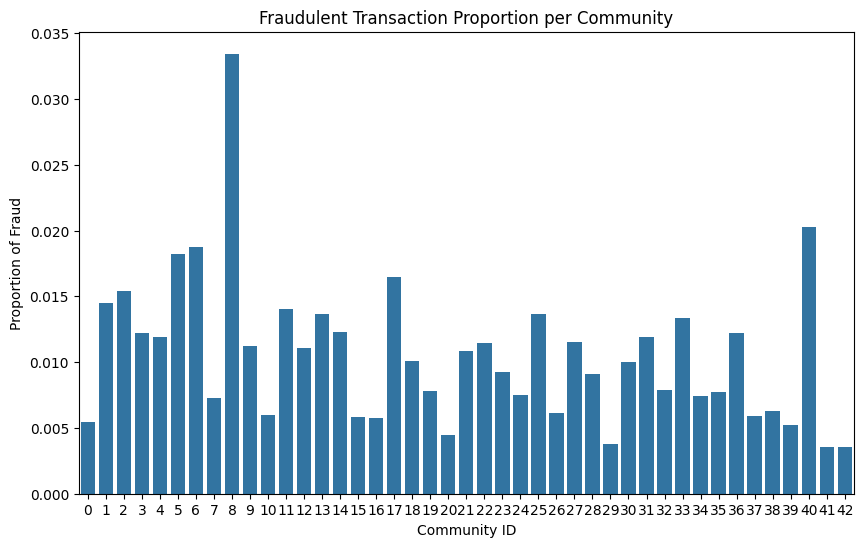

In [35]:

community_sizes = train_df['community'].value_counts()
print("Community Sizes:\n", community_sizes)

fraud_by_community = train_df.groupby('community')['is_fraud'].mean()
print("\nProportion of Fraudulent Transactions per Community:\n", fraud_by_community)


plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_community.index, y=fraud_by_community.values)
plt.xlabel("Community ID")
plt.ylabel("Proportion of Fraud")
plt.title("Fraudulent Transaction Proportion per Community")
plt.show()



In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33071 entries, 0 to 33070
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    33071 non-null  object 
 1   category    33071 non-null  object 
 2   amt         33071 non-null  float64
 3   gender      33071 non-null  object 
 4   city        33071 non-null  object 
 5   state       33071 non-null  object 
 6   job         33071 non-null  object 
 7   is_fraud    33071 non-null  float64
 8   distance    33071 non-null  float64
 9   city_state  33071 non-null  object 
 10  age         33071 non-null  int64  
 11  embedding   33071 non-null  object 
 12  community   33071 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 3.3+ MB


In [28]:
train_df.dropna()

,merchant,category,amt,gender,city,state,job,is_fraud,distance,city_state,age,embedding,community
0,fraud_cormier stracke thiel,entertainment,2.77,F,Corona,CA,Wellsite geologist,0.0,0.330167,Corona_CA,58,"[-0.07120546, 0.26091632, -0.13073629, 0.07962...",0
1,fraud_zieme bode dooley,gas_transport,18.68,M,Kirk,CO,Network engineer,0.0,0.183770,Kirk_CO,69,"[0.0793264, 0.0024085687, -0.23092827, 0.07014...",3
2,fraud_greenholt ohara balistreri,shopping_net,9.95,F,Notrees,TX,Cytogeneticist,0.0,0.415602,Notrees_TX,55,"[-0.17443182, -0.06987521, 0.1616345, -0.27719...",6
3,fraud_kiehn inc,grocery_pos,62.86,M,Sula,MT,"Therapist, horticultural",0.0,0.512691,Sula_MT,29,"[0.24665266, -0.17093204, 0.05577185, -0.01379...",8
4,fraud_reichel inc,entertainment,9.66,F,Scotland,MD,Insurance underwriter,0.0,0.165779,Scotland_MD,48,"[0.22466221, -0.059002936, -0.07494419, -0.166...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33066,fraud_ebertdaugherty,travel,494.14,M,Shippingport,PA,Secretary/administrator,0.0,0.889681,Shippingport_PA,46,"[0.24649452, -0.12884985, 0.0046374765, 0.1622...",39
33067,fraud_mccullough hudson schuster,food_dining,57.24,F,Holcomb,KS,Arboriculturist,0.0,0.605912,Holcomb_KS,31,"[0.11085388, 0.13590637, -0.04328465, 0.240697...",7
33068,fraud_parker nolan trantow,entertainment,1.67,F,Irvine,PA,Chief Marketing Officer,0.0,0.385180,Irvine_PA,52,"[-0.17153665, 0.16243483, 0.13984342, -0.16820...",23
33069,fraud_okuneva schneider rau,shopping_pos,150.66,F,Cottekill,NY,Comptroller,0.0,1.014515,Cottekill_NY,34,"[0.1621417, 0.015648866, -0.19107282, 0.061352...",20


In [29]:
for col in train_df.columns:
    if train_df[col].dtype == 'object' and col != 'embedding':  # Skip 'embedding' column
        train_df[col] = train_df[col].astype('category')

In [30]:
train_df=train_df.dropna()

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the 'gender' column in both training and validation data
train_df['gender_encoded'] = le.fit_transform(train_df['gender'])


X =  train_df[['amt', 'distance', 'age', 'gender_encoded','community']]
y = train_df['is_fraud']



classification report 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      6544
         1.0       0.69      0.34      0.45        71

    accuracy                           0.99      6615
   macro avg       0.84      0.67      0.72      6615
weighted avg       0.99      0.99      0.99      6615

confusion_matrix 
 [[6533   11]
 [  47   24]]


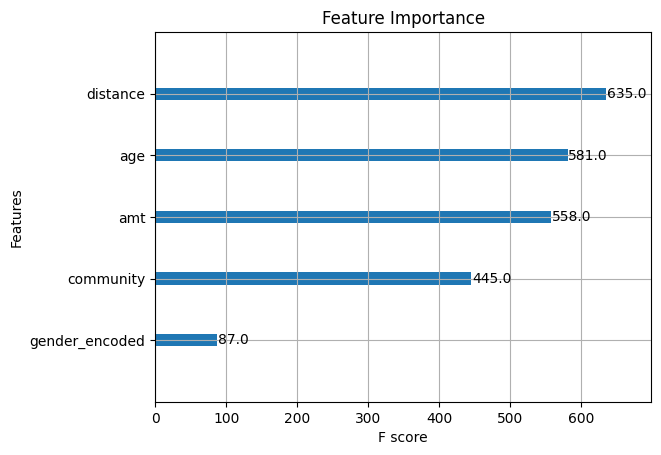

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42, enable_categorical=True)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

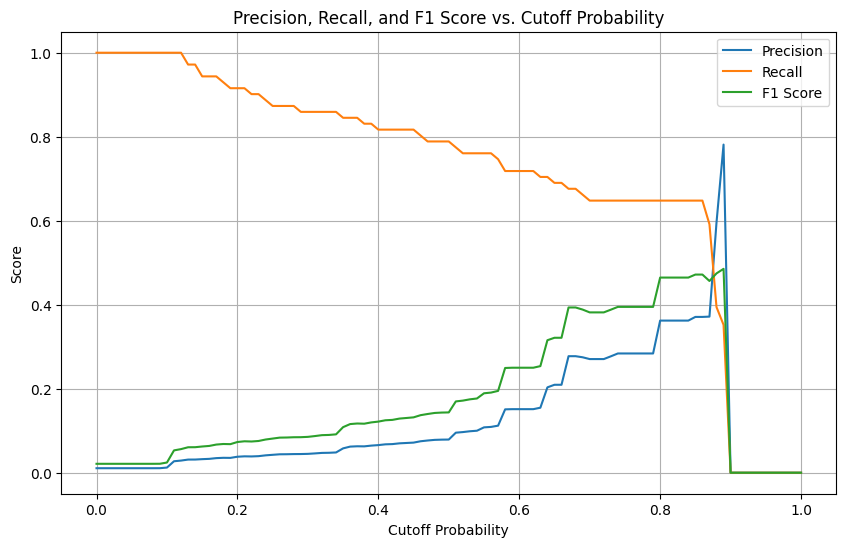

Best cutoff for F1 Score: 0.89
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      6544
         1.0       0.78      0.35      0.49        71

    accuracy                           0.99      6615
   macro avg       0.89      0.68      0.74      6615
weighted avg       0.99      0.99      0.99      6615



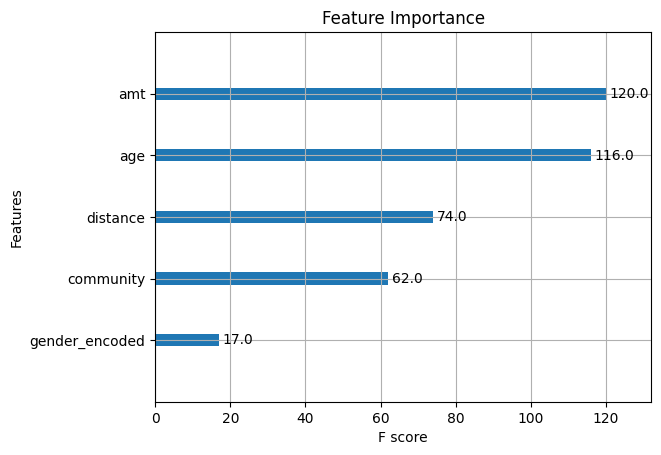

In [39]:
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score, f1_score

y_val_pred_proba = model.predict_proba(X_val)[:, 1]
cutoffs = np.linspace(0, 1, 101)
precision = []
recall = []
f1 = []

for cutoff in cutoffs:
    y_val_pred = (y_val_pred_proba >= cutoff).astype(int)
    precision.append(precision_score(y_val, y_val_pred))
    recall.append(recall_score(y_val, y_val_pred))
    f1.append(f1_score(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(cutoffs, precision, label='Precision')
plt.plot(cutoffs, recall, label='Recall')
plt.plot(cutoffs, f1, label='F1 Score')
plt.xlabel('Cutoff Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Cutoff Probability')
plt.legend()
plt.grid(True)
plt.show()


best_cutoff = cutoffs[np.argmax(f1)]
print(f"Best cutoff for F1 Score: {best_cutoff}")

y_val_pred = (y_val_pred_proba >= best_cutoff).astype(int)
print(classification_report(y_val,y_val_pred))


xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

classification report 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      6547
         1.0       0.94      1.00      0.97       659

    accuracy                           0.99      7206
   macro avg       0.97      1.00      0.98      7206
weighted avg       0.99      0.99      0.99      7206

confusion_matrix 
 [[6508   39]
 [   1  658]]


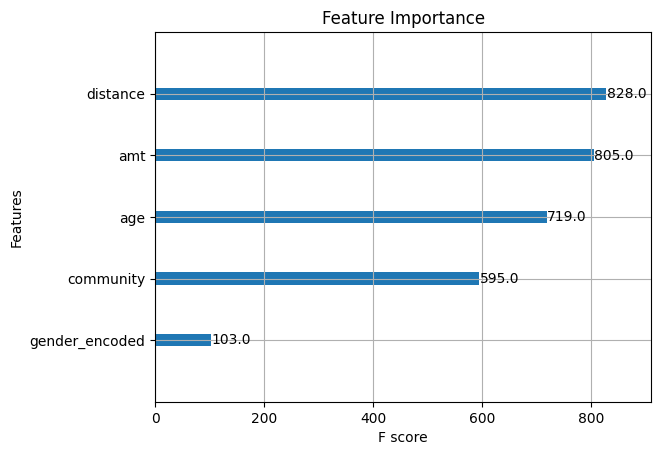

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


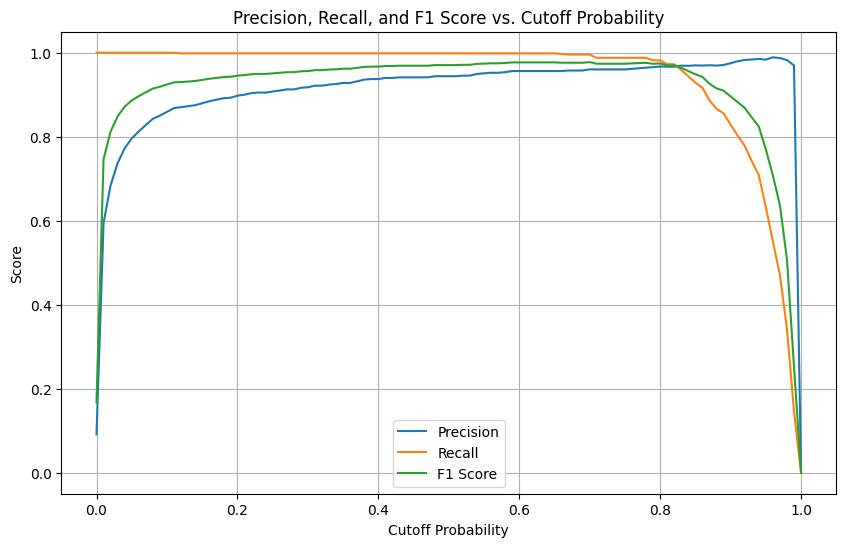

Best cutoff for F1 Score: 0.7000000000000001
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6547
         1.0       0.96      1.00      0.98       659

    accuracy                           1.00      7206
   macro avg       0.98      1.00      0.99      7206
weighted avg       1.00      1.00      1.00      7206



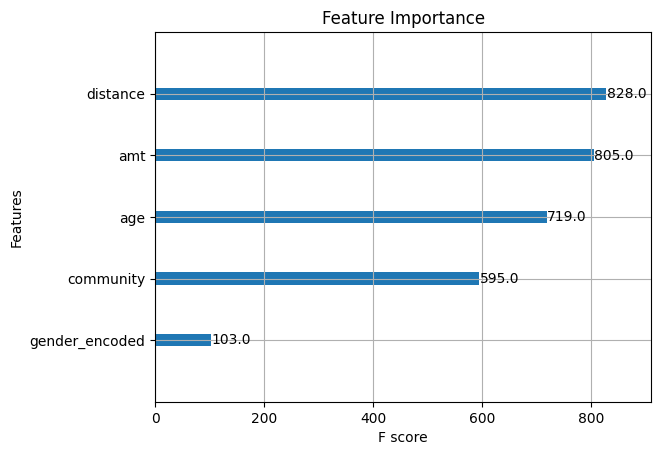

In [42]:

df_majority = train_df[train_df.is_fraud==0]
df_minority = train_df[train_df.is_fraud==1]

# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=int(0.1*len(train_df)),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
train_df_upsampled.is_fraud.value_counts()


le = LabelEncoder()
train_df_upsampled['gender_encoded'] = le.fit_transform(train_df_upsampled['gender'])

X =  train_df_upsampled[['amt', 'distance', 'age', 'gender_encoded','community']]
y = train_df_upsampled['is_fraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42, enable_categorical=True)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

y_val_pred_proba = model.predict_proba(X_val)[:, 1]
cutoffs = np.linspace(0, 1, 101)
precision = []
recall = []
f1 = []

for cutoff in cutoffs:
    y_val_pred = (y_val_pred_proba >= cutoff).astype(int)
    precision.append(precision_score(y_val, y_val_pred))
    recall.append(recall_score(y_val, y_val_pred))
    f1.append(f1_score(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(cutoffs, precision, label='Precision')
plt.plot(cutoffs, recall, label='Recall')
plt.plot(cutoffs, f1, label='F1 Score')
plt.xlabel('Cutoff Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Cutoff Probability')
plt.legend()
plt.grid(True)
plt.show()

best_cutoff = cutoffs[np.argmax(f1)]
print(f"Best cutoff for F1 Score: {best_cutoff}")

y_val_pred = (y_val_pred_proba >= best_cutoff).astype(int)
print(classification_report(y_val,y_val_pred))

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

[0]	validation_0-auc:0.93756
[1]	validation_0-auc:0.93817
[2]	validation_0-auc:0.93440
[3]	validation_0-auc:0.93406
[4]	validation_0-auc:0.94341
[5]	validation_0-auc:0.94322
[6]	validation_0-auc:0.93374
[7]	validation_0-auc:0.94300
[8]	validation_0-auc:0.94083
classification report 
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      6544
         1.0       0.08      0.79      0.14        71

    accuracy                           0.90      6615
   macro avg       0.54      0.84      0.54      6615
weighted avg       0.99      0.90      0.94      6615

confusion_matrix 
 [[5891  653]
 [  15   56]]


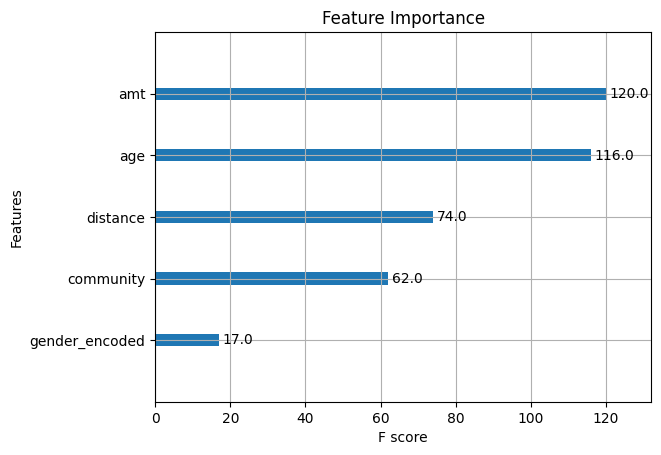

In [41]:
scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])

model = xgb.XGBClassifier(early_stopping_rounds =5 ,eval_metric='auc', random_state=42,enable_categorical=True,scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train,eval_set=[(X_val, y_val)])

y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


##### Use stacking

In [ ]:
import lightgbm as lgbm
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('lgbm',lgbm.LGBMClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, enable_categorical=True))
]


In [ ]:
meta_learner = LogisticRegression()
!pip install scikit-learn==1.0.2
!pip install --upgrade xgboost
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_model.fit(X_train, y_train)


In [ ]:
#model = xgb.XGBClassifier(early_stopping_rounds=10, eval_metric='auc',enable_categorical=True)
#model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Make predictions on the validation set
y_val_pred = stacking_model.predict(X_val)

print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")
